In [1]:
# Set up stlab
from pyplr import stlab
d = stlab.SpectraTuneLab(password='2294b16eea08a15a')
d.turn_off()

LIGHT HUB login success
User authenticated as: admin
The following addresses are defined: [1, 1004, 1023]
Call get_luminaires() / get_device_info() for more info


<Response [200]>

In [3]:
from time import sleep
from pyplr.pupil import PupilCore

p = PupilCore()

p.command('R our_recording')

sleep(1)

p.command('r')

'OK'

In [4]:
p.check_3d_model()

> Refit the 3d model? [y/n]:  y


> Unfreezing 3d model for eye 0
> Unfreezing 3d model for eye 1
> Ask the participant to roll their eyes


> Press "Enter" when ready to freeze the model:  


> Freezing 3d model for eye 0
> Freezing 3d model for eye 1


In [5]:
p = PupilCore()
pgr_future = p.pupil_grabber(topic='pupil.1.3d', seconds=5)

> Grabbing 5 seconds of pupil.1.3d
> PupilGrabber done grabbing 5 seconds of pupil.1.3d


In [6]:
data = pgr_future.result()
data[0]

{'id': 1,
 'topic': 'pupil.1.3d',
 'method': 'pye3d 0.3.0 real-time',
 'norm_pos': [0.45474805111731925, 0.5117690500503111],
 'diameter': 70.4349601574955,
 'confidence': 0.8997386693954468,
 'timestamp': 857254.806821,
 'sphere': {'center': [5.428859873697776,
   1.5158711826708404,
   29.645162480808402],
  'radius': 10.392304845413264},
 'projected_sphere': {'center': [147.57779242420835, 110.32800286127784],
  'axes': [238.7117563901768, 238.7117563901768],
  'angle': 0.0},
 'circle_3d': {'center': [-0.35096332744992065,
   -0.08439277400640077,
   21.157948625105547],
  'normal': [-0.5561637468418444, -0.15398547102701013, -0.8166825340433275],
  'radius': 2.3082179772098277},
 'diameter_3d': 4.616435954419655,
 'ellipse': {'center': [87.3116258145253, 93.74034239034025],
  'axes': [59.49021781862252, 70.4349601574955],
  'angle': 15.393614300071832},
 'location': [87.3116258145253, 93.74034239034025],
 'model_confidence': 1.0,
 'theta': 1.7253969225888828,
 'phi': -2.16865893474

Text(0.5, 0, 'Pupil timestamp (s)')

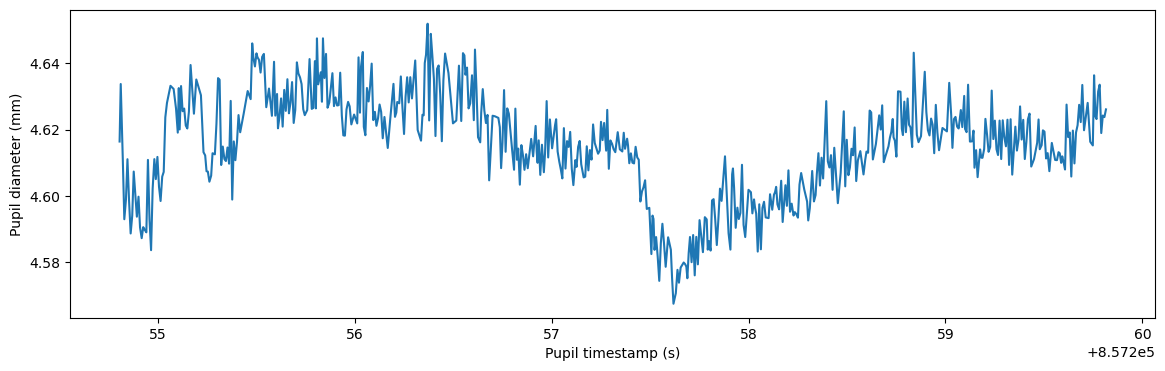

In [7]:
import matplotlib.pyplot as plt
from pyplr.utils import unpack_data_pandas

data = unpack_data_pandas(data, cols=['timestamp','diameter_3d'])
ax = data['diameter_3d'].plot(figsize=(14,4))
ax.set_ylabel('Pupil diameter (mm)')
ax.set_xlabel('Pupil timestamp (s)')